# Bharat Intern Task-2
This is the Solution of "Machine Learning model to predict the quality of wine using linear regression".

Let's start by importing libraries that we are using

# Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [2]:
Data=pd.read_csv('WineQT.csv')

In [3]:
Data.head()                # to see first 5 rows of dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
Data.shape            #to obtain the dimensions of dataset

(1143, 13)

# Data preprocessing

Let's see the variables present in our dataset and there data types

In [5]:
Data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [6]:
Data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Here quality is our target variable

In [7]:
# identification of missing values
Data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

there is no missing value in dataset

# Univariate Analysis

In [8]:
# statistical measure in dataset
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Plotting histogram for all variables

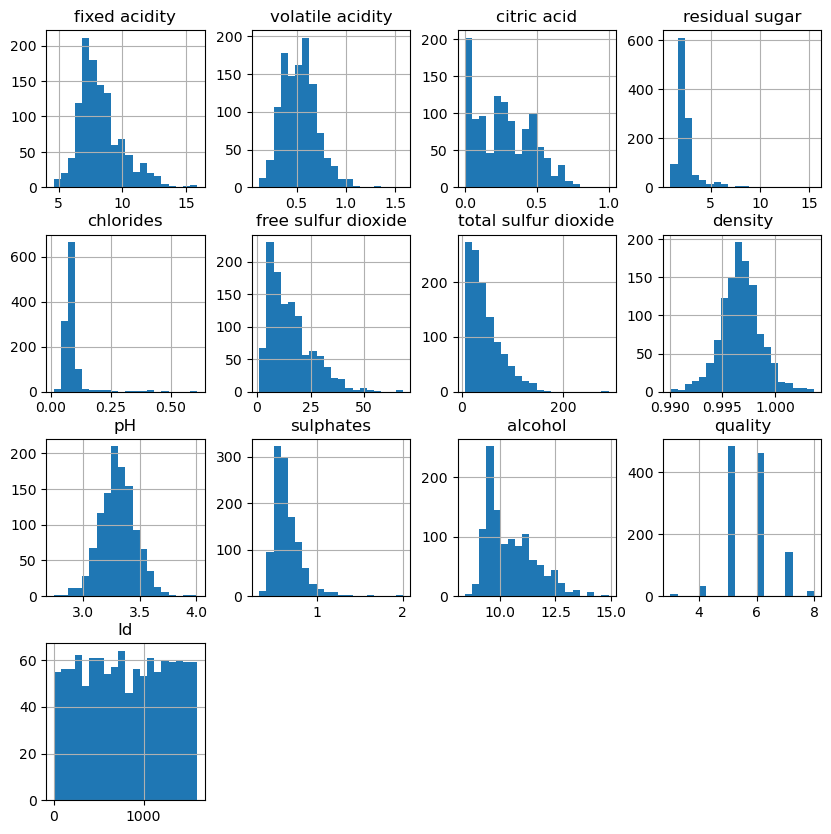

In [9]:
Data.hist(bins=20,figsize=(10,10))
plt.show()

# Bivariate Analysis

We will draw some scatter plot between two variables in dataset

<Axes: xlabel='alcohol', ylabel='quality'>

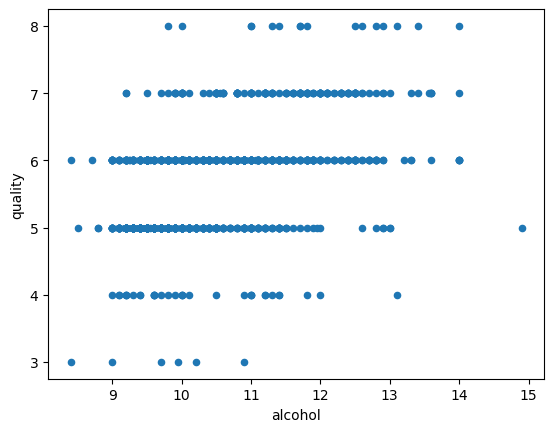

In [10]:
Data.plot.scatter('alcohol','quality')

<Axes: xlabel='alcohol', ylabel='citric acid'>

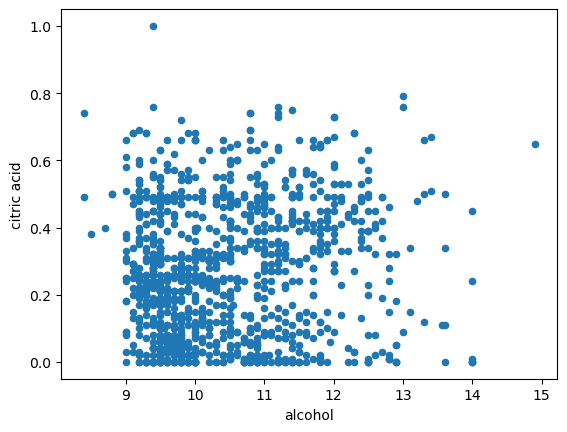

In [11]:
Data.plot.scatter('alcohol','citric acid')

# Splitting the Dataset

lets' spilt the dataset in train and test dataset

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Data.drop('quality',axis=1),Data['quality'],test_size=0.25)

In [13]:
# set of independent variables in train dataset
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
150,8.2,0.570,0.26,2.2,0.060,28.0,65.0,0.99590,3.30,0.43,10.1,213
163,8.0,0.380,0.06,1.8,0.078,12.0,49.0,0.99625,3.37,0.52,9.9,231
205,7.5,0.400,0.12,3.0,0.092,29.0,53.0,0.99670,3.37,0.70,10.3,287
468,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,658
557,6.9,0.635,0.17,2.4,0.241,6.0,18.0,0.99610,3.40,0.59,10.3,777


In [14]:
x_train.shape

(857, 12)

In [15]:
# set of dependent variables in train dataset
y_train.head()

150    5
163    6
205    6
468    6
557    6
Name: quality, dtype: int64

In [16]:
y_train.shape

(857,)

In [17]:
# set of independent variables in test dataset
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
54,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,79
709,8.9,0.320,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4,1011
539,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,755
1116,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,1563
1002,6.6,0.960,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,1410


In [18]:
# set of dependent variables in test dataset
y_test.head()


54      4
709     6
539     6
1116    5
1002    6
Name: quality, dtype: int64

# Model Building

In [19]:
# importing Linear regression
from sklearn.linear_model import LinearRegression
# creating object
lreg=LinearRegression()


# Fitting the training dataset

In [20]:
lreg.fit(x_train,y_train)

LinearRegression()

In [21]:
# making predication on the validation set
pred=lreg.predict(x_test)

To check the performance of our model we will use R-squared,

In [22]:
# performance of our model
lreg.score(x_test,y_test)

0.37488090980478506

In [23]:
lreg.score(x_train,y_train)

0.3716162532746242

# Evaluation of model
Evaluation matrix which we are using is RMSE


In [24]:
rmse_train=np.sqrt(np.mean(np.power((np.array(y_train)-np.array(lreg.predict(x_train))),2)))

In [25]:
rmse_train

0.6380045659757255

In [26]:
rmse_test=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)),2)))

In [27]:
rmse_test

0.6383283416087018

Here, we can see that R-squared value of train and test dataset are almost equal therefore test dataset is good reprentative of train dataset and from the rmse value we can say thay our model is good fit.